### Pytorch Workflow

pytorch end-to-end workflow

1. get data ready -> turn it into tensors
2. build or pick a model
  - pick a loss function and optimizer
  - build a training loop (iterate step 2)
3. fir the model to the data -> make a perdiction ( *inference* )

4. Evaluate the model
5. Improve through expermentation
6. save and reload the trained model

In [39]:
import torch
from torch import nn # nn contrain all of pytorch building blocks for neural networks

In [40]:
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)
- excel spreadsheet
- images
- audio
- DNA
- text, literally anything!

`torchvision.transforms` : computer vision

`torch.utils.data.Dataset` :for complex data loading

`torch.utils.data.DataLoader`

In [41]:
  # Linear regression model
  #create independent parameter
weight =0.7
bias = 0.3

#create data
start =0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias

In [42]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### spliting the data into test and train

- training -> validation -> test
- example:
(course) ->   (mock exam) ->  (final exam)
- the goal is to create genrealization for the model

In [43]:
len(X),len(y)

(50, 50)

In [44]:
# spliting the data into test and train 80-20
train_split= int(0.8* len(X))  #80% of 50 length= 40

X_train,y_train= X[:train_split],y[:train_split]

X_test,y_test= X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [45]:
def plot_predictions(train_data=X_train,
                     train_labels =y_train,
                     test_data= X_test,
                     test_labels=y_test,
                     predictions=None):
  """
    plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7)) # decide the plot size

  # train data
  plt.scatter(train_data, train_labels, c="blue",s=4,label="training data")

  #test data
  plt.scatter(test_data,test_labels,c="red",s=4,label="Testing data")

  #if there are no predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c="green",s=4,label="Predictions")
  # show the legen - labels
  plt.legend(prop={"size":14})


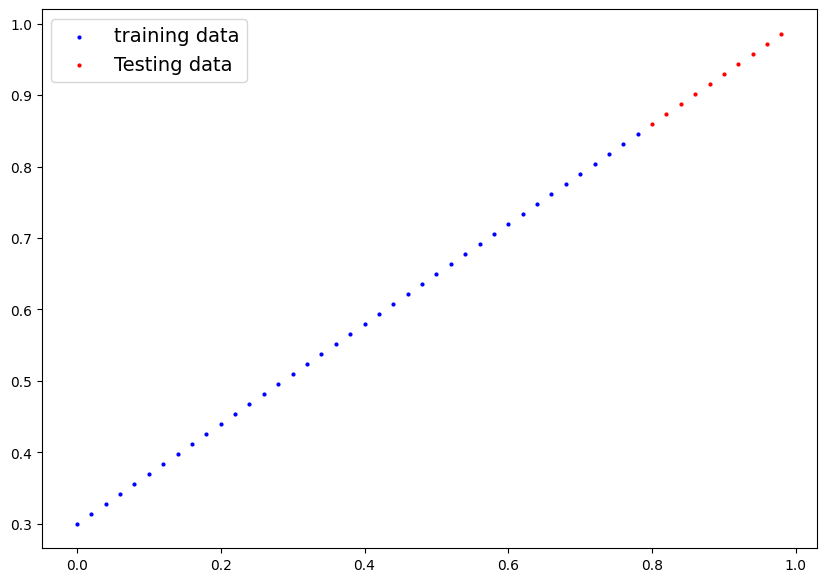

In [46]:
plot_predictions()

## 2. Build model -Linear regression
 `y=mx+c`

weight, bias are parameters here - `nn.parameters`

-  `nn.Parameter`is a special type of tensor that is automatically registered as a parameter of a neural network module  also, it is a learnable parameter of your model that needs to be optimized during the training process.

`-> torch.Tensor`: This is a type hint indicating that the method is expected to return a PyTorch tensor.

`requires_grad=True` : gradient decent algorithm -iteratively calculating the gradient(slope)

In [47]:
class LinearRegressionModel(nn.Module): # Base class for all NN modules
  def __init__(self):
    super().__init__()
    #Initialize Model Parameters
    self.weights= nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float)) #weight
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x +self.bias #linear regression


#### pytorch nn essentials
1. `torch.nn`- contains all building blocks for computational graphs
2. `torch.nn.Parameter`- what parameters are model learns
3. `torch.nn.Module` -The base class for all NN modules, if we subclass it we can overwrite the `forward()` method
4. `torch.optim` - optimizers in pytorch : gradient descent
5. `def forward()` - all nn.Module subclasses are required to override this function

In [48]:
torch.manual_seed(42)
#instance
model_0= LinearRegressionModel()
#see parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [49]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [54]:
#make predictions with model
with torch.inference_mode(): # with - context manager
  y_preds= model_0(X_test)
y_preds
#torch.inference_mode() -> turns off gradient tracking
# also can use torch.no_grad()

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [52]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

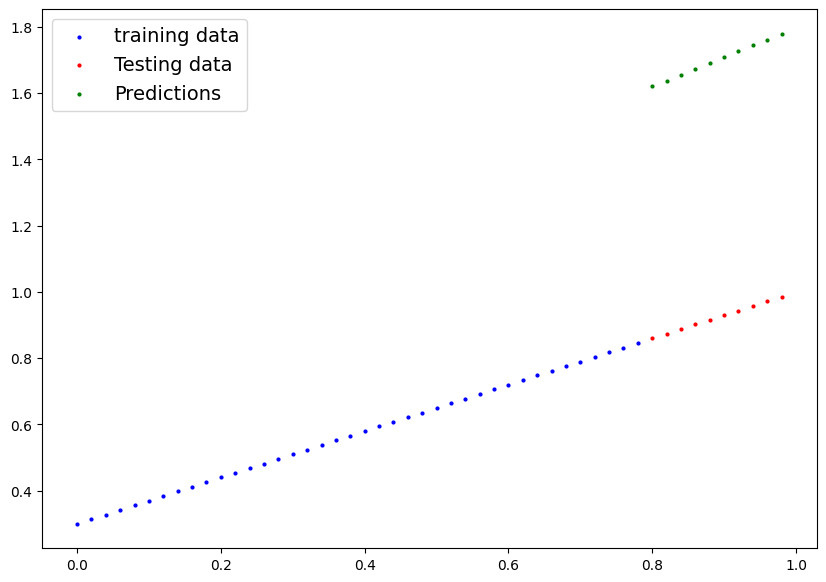

In [53]:
plot_predictions(predictions=y_preds)

## 3. Training Model
move from unknown param -> known parameters

to measure this - we *loss function* / *cost function* / *criterion*

Things we need to train:
 - *Loss fucntion*- A fucntion to measure how wrong the model's performance to the ideal output is - lower the better
 - *optimizer* - Takes into account the loss of a model and adjust the model's parameters to improve the loss function

in pytorch we need:
- A training loop
- A testing loop





In [ ]:
#loss fucntion- for this problem nn.L1Loss( mean absolute error (MAE))- just the distance
loss_fn =nn.L1Loss()

#optimizer - torch.optim: optimization algorithms
#SGD -Stochastic (random) gradient descent

optimizer = torch.optim.SGD(params=model.parameter,lr=0.01)
